In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Image
from scipy.optimize import minimize

In [2]:
def loaddata(filename,delimeter):
    data = np.loadtxt(filename,delimiter = delimeter)
    print "data shape",data.shape
    print "show data",data[:6,:]
    return data
%matplotlib inline
def plotdata(data,axes=None):
    negative_data = data[:,2]==0   ##注意这里的写法  666 选出反例的下标
    positive_data = data[:,2]==1
    if axes==None:
        axes = plt.gca()    # 获取当前Axes对象
    axes.scatter(data[negative_data][:,0],data[negative_data][:,1],s=40,c='r',marker='x',label="fail")
    axes.scatter(data[positive_data][:,0],data[positive_data][:,1],s=40,c='g',marker='o',label="pass")
    axes.set_xlabel("figture1")
    axes.set_ylabel("figture2")
    axes.legend(frameon=True,fancybox=True)
#     plt.show()
def sigmod(z):
    return 1.0/(1+np.exp(-z))



In [3]:
data = loaddata("ex2data1.txt",',')

data shape (100, 3)
show data [[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


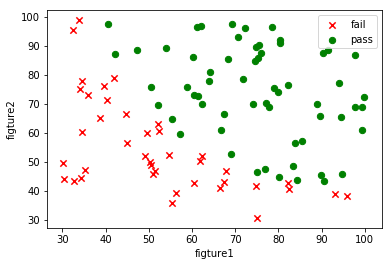

In [4]:
plotdata(data)

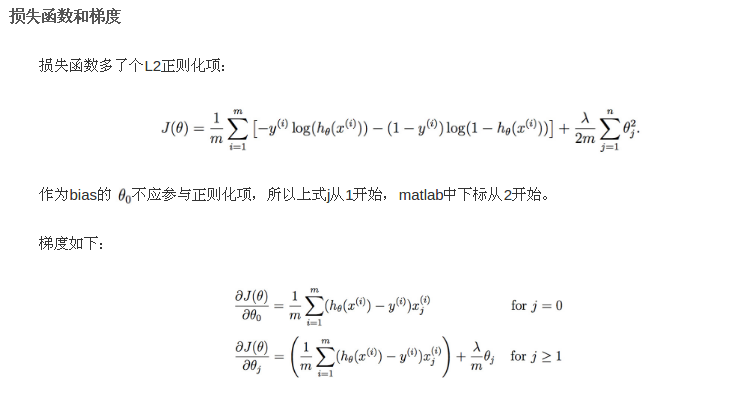

In [5]:
Image(filename="Loss.png")

In [6]:
def computeLoss(theta,X,Y,Lambda=0):
    m=Y.size
    '''计算整个训练集上的Loss值
    '''
    h = sigmod(X.dot(theta.T))
    J = (1.0/m)*np.sum(-Y.T.dot(np.log(h))-(1-Y).T.dot(np.log(1-h)))
    R = (Lambda/2*m)*np.sum(np.square(theta[1:]))
    return J+R

In [7]:
def GradientDescent(X,Y,theta,Lambda=0,LearnRate=0.001,num_iters=150000):
    J_history = np.zeros(num_iters)
    m = Y.size
    
    for i in range(num_iters):
        J_history[i] = computeLoss(theta,X,Y,Lambda)
        h = sigmod(X.dot(theta.reshape(-1,1)))
        G = (1.0/m)*(h-Y).T.dot(X)+Lambda/m * (np.r_[[0],theta[1:]])
        theta = theta - LearnRate*G.flatten()
        
    return theta,J_history

def predict(X,theta,threshold):
    p = sigmod(X.dot(theta.reshape(-1,1)))>=threshold
    return p.astype("int")


In [8]:
def Gradient(theta,X,Y,Lambda=0):
    m = Y.size
    h = sigmod(X.dot(theta.reshape(-1,1)))
    G = (1.0/m)*(h-Y).T.dot(X)+Lambda/m * (np.r_[[0],theta[1:]])
    return G.flatten()

[-6.28026563  0.05646576  0.04975402]
[ 0.69314718  0.69829069  0.65971176 ...,  0.34402735  0.34402668
  0.34402601]


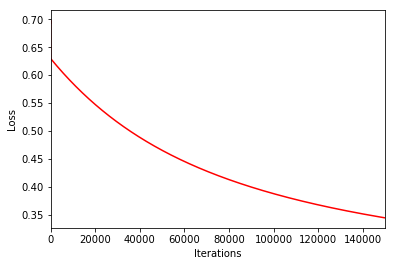

In [9]:
X1 = np.c_[np.ones((data.shape[0],1)),data[:,:-1]]
Y1 = np.c_[data[:,-1]]
theta = np.array(np.zeros(X1.shape[1]))
# print theta
res_theta,history = GradientDescent(X1,Y1,theta)

plt.xlim(0,150000)
plt.ylim()
plt.plot(history,c='r',label = 'Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")

print res_theta
print history

In [10]:
theta2 = np.array(np.zeros(X1.shape[1]))
res = minimize(computeLoss,theta2,args=(X1,Y1),jac =Gradient,options={"maxiter":400})
res

/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


      fun: 0.20349770158944375
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476824e-09,  -9.31921320e-07,  -2.82608931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

(683, 689)


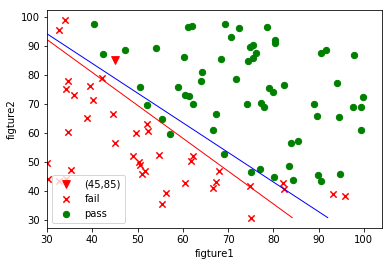

In [11]:
plt.scatter(45,85,s=60,c='r',marker='v',label='(45,85)')
plotdata(data)
x1_min,x1_max = X1[:,1].min(),np.max(X1[:,1])
x2_min,x2_max = X1[:,2].min(),np.max(X1[:,2])
h = 0.1

xx = np.arange(x1_min,x2_max,h)
yy = np.arange(x2_min,x2_max,h)

xx1,xx2 = np.meshgrid(xx,yy) #建表格，x，y是矩阵

rres1 = np.c_[np.ones((xx1.ravel().shape[0],1)),xx1.ravel(),xx2.ravel()].dot(res.x) #
zz = sigmod(rres1)     #计算z
zz = zz.reshape(xx1.shape)  #将z的值向量分成矩阵

print xx1.shape #(683,689)

rres2 = np.c_[np.ones((xx1.ravel().shape[0],1)),xx1.ravel(),xx2.ravel()].dot(res_theta.reshape(-1,1)) #
zz2 = sigmod(rres2)
zz2 = zz2.reshape(xx1.shape)


plt.contour(xx1,xx2,zz,[0.5],linewidths=1,colors='b')   #画分界线    xx1,xx2 代表坐标，zz是值，当值为 0.5时点才显示
plt.contour(xx1,xx2,zz2,[0.5],linewidths=1,colors='r')  #画分界线2


data shape (118, 3)
show data [[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


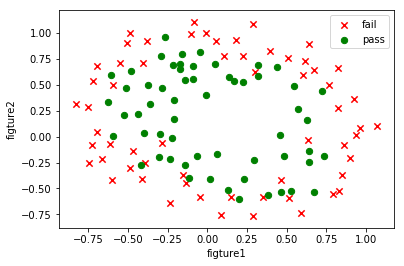

In [12]:
data2 = loaddata("ex2data2.txt",',')
X2 = np.c_[np.ones(data2.shape[0]),data2[:,0:2]]
Y2 = data2[:,2].reshape(-1,1)
plotdata(data2)

(118, 28)
91
(50, 50)
49
(50, 50)
49
(50, 50)


/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: overflow encountered in exp


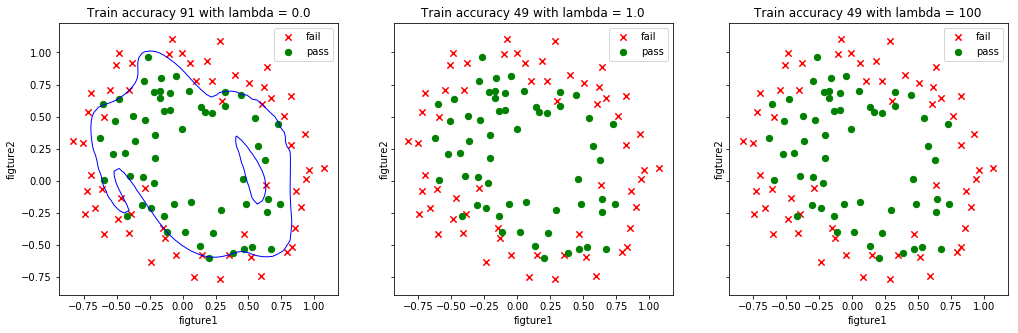

In [18]:
poly = PolynomialFeatures(6)
X22 = poly.fit_transform(data2[:,0:2])
print X22.shape

fig,axes = plt.subplots(1,3,sharey=True,figsize=(17,5))
for i,c in enumerate([0.0,1.0,100]):
    theta3 = np.array(np.zeros(X22.shape[1]))
    res2 = minimize(computeLoss,theta3,args=(X22,Y2,c),jac=Gradient,options={'maxiter':3000})
    
    accuracy = 100*np.sum(predict(X22,res2.x,0.5)==Y2)/Y2.size
    print accuracy
    plotdata(data2,axes.flatten()[i])
    x1_min,x1_max = X22[:,1].min(),X22[:,1].max()
    x2_min,x2_max = X22[:,2].min(),X22[:,2].max()
    xx = np.linspace(x1_min,x1_max)
    yy = np.linspace(x2_min,x2_max)
    xx1,xx2 = np.meshgrid(xx,yy)
    
    rres1 = poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(res2.x) #
    zz = sigmod(rres1)     #计算z
    zz = zz.reshape(xx1.shape)
    print zz.shape
    
    axes.flatten()[i].contour(xx1,xx2,zz,[0.5],linewidths=1,colors='b')
    axes.flatten()[i].set_title("Train accuracy {} with lambda = {}".format(np.round(accuracy,decimals=2),c))